In [2]:
import numpy as np 
# print(np.random.seed(0))

In [ ]:
def compute_reciprocals(values): 
    output = np.empty(len(values)) 
    for i in range(len(values)):
        output[i] = 1.0 / values[i] 
    return output

In [ ]:
values = np.random.randint(1, 10, size=5)
# np.random.seed(0)
print(values)
# print(type(values))
print(values[4])

In [ ]:
compute_reciprocals(values)

In [ ]:
%%timeit
big_array = np.random.randint(1, 100, size=1000000) 
compute_reciprocals(big_array)

In [ ]:
print(compute_reciprocals(big_array))

It turns out that the bottleneck here is not the operations themselves, but the type-checking and function dispatches that CPython must do at each cycle of the loop. Each time the reciprocal is computed, Python first examines the object’s type and does a dynamic lookup of the correct function to use for that type. If we were working in compiled code instead, this type specification would be known before the code exe‐ cutes and the result could be computed much more efficiently

In [ ]:
print(compute_reciprocals(values)) 
print(1.0 / values)

In [ ]:
 %timeit (1.0 / big_array)

In [2]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [20]:
 y = np.zeros(10)

In [36]:
np.power(2, x, out=y[::2])

array([ 1.,  2.,  4.,  8., 16.])

In [37]:
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


In [38]:
 x = np.arange(1, 6)

In [40]:
 np.add.reduce(x)

15

In [41]:
np.multiply.reduce(x)

120

If we’d like to store all the intermediate results of the computation, we can instead use accumulate:

In [43]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [44]:
np.multiply.accumulate(x)


array([  1,   2,   6,  24, 120])

any ufunc can compute the output of all pairs of two different inputs using the outer method. This allows you, in one line, to do things like create a multiplica‐ tion table:

In [3]:
x = np.arange(1, 8)

In [53]:
np.multiply.outer(x, x)


array([[ 1,  2,  3,  4,  5,  6,  7],
       [ 2,  4,  6,  8, 10, 12, 14],
       [ 3,  6,  9, 12, 15, 18, 21],
       [ 4,  8, 12, 16, 20, 24, 28],
       [ 5, 10, 15, 20, 25, 30, 35],
       [ 6, 12, 18, 24, 30, 36, 42],
       [ 7, 14, 21, 28, 35, 42, 49]])

#### US President Height Example

In [60]:
!head -5 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163


In [3]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv') 
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [62]:
 print("Mean height: ", heights.mean())

Mean height:  179.73809523809524


In [63]:
 print("Standard deviation:", heights.std())

Standard deviation: 6.931843442745892


In [64]:
print("Min height:", heights.min())

Min height: 163


In [65]:
print("max height:", heights.max())

max height: 193


In [66]:
print("25th percentile:  ", np.percentile(heights, 25))     
print("Median:", np.median(heights))
print("75th percentile:", np.percentile(heights, 75))




25th percentile:   174.25
Median: 182.0
75th percentile: 183.0


In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

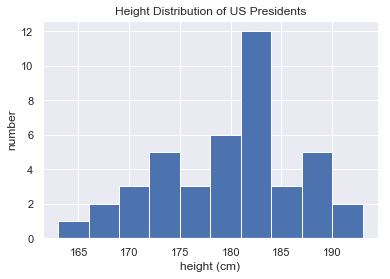

In [78]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

### Example: Counting Rainy Days

In [79]:
import numpy as np 
import pandas as pd
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values

In [81]:
inches = rainfall / 254 # 1/10mm -> inches

In [83]:
inches.shape

(365,)

In [84]:
 %matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles

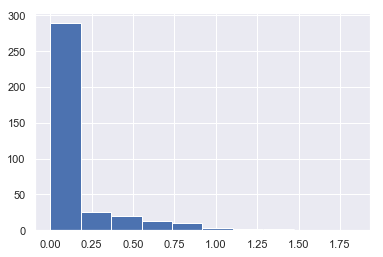

In [88]:
plt.hist(inches, 10);

### Broadcasting Example--  centering an array of data. Imagine you have an array of 10 observations, each of which consists of 3 values.

In [89]:
X = np.random.random((10, 3))
X

array([[0.87282449, 0.94231618, 0.07312046],
       [0.53123473, 0.28074889, 0.73599777],
       [0.57073941, 0.42062585, 0.50991742],
       [0.58653623, 0.13033748, 0.59878001],
       [0.31006397, 0.7275989 , 0.89882244],
       [0.89949644, 0.86283843, 0.79683597],
       [0.91853884, 0.31792544, 0.40868792],
       [0.73200626, 0.64702371, 0.3189675 ],
       [0.51079243, 0.68564936, 0.00220637],
       [0.5216772 , 0.76116459, 0.15964494]])

In [90]:
Xmean = X.mean(0)

In [91]:
Xmean

array([0.645391  , 0.57762288, 0.45029808])

In [92]:
X_centered = X - Xmean

In [93]:
X_centered

array([[ 0.22743349,  0.36469329, -0.37717762],
       [-0.11415627, -0.29687399,  0.28569969],
       [-0.07465159, -0.15699703,  0.05961934],
       [-0.05885477, -0.4472854 ,  0.14848193],
       [-0.33532703,  0.14997602,  0.44852436],
       [ 0.25410544,  0.28521555,  0.34653789],
       [ 0.27314784, -0.25969745, -0.04161016],
       [ 0.08661526,  0.06940083, -0.13133058],
       [-0.13459857,  0.10802648, -0.44809171],
       [-0.1237138 ,  0.1835417 , -0.29065314]])

In [94]:
# we can check that the centered array has near zero mean: 
X_centered.mean(0)

array([-3.33066907e-17,  4.44089210e-17, -3.33066907e-17])